# Bonus: Intro a Clasificación

En Modelado Estadístico (y Computación), existe una rama bastante amplia llamada aprendizaje automático (o aprendizaje de Máquina). La idea es enseñarle a la computadora a hacer tareas que los seres humanos podemos hacer, pero que ella lo haga más rápido y hasta más eficiente. ¿Qué tipo de tareas? Principalmente, predicciones.

El ejemplo más sencillo es la clasificación. Se trata de, basarnos en experiencia previa, adivinar a qué categoría pertenece un objeto, persona, etc. Por ejemplo:

La Persona a la cuál le pretendo prestar dinero, ¿Pagará a tiempo o no pagará?
El virus que aparece en esta prueba PCR, ¿es o no Covid-19?
El coche autónomo, ¿deberá frenar o no al ir en la carretera?
¿Qué categoría de imágenes te debo mostrar en Instagram para que estés más tiempo en el app?

Para resolver esos problemas, existe una infinidad de _algoritmos_. Hoy veremos un ejemplo sencillo.

In [11]:
import numpy as np

# Matplotlib nos ayudará a graficar
import matplotlib.pyplot as plt

# sklearn nos ayudará a modelar.
from sklearn import datasets

Vamos a cargar un set de datos. A ver si puedes reconocer qué estructura es:

In [2]:
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

¡Es un Diccionario! Bueno, para ser más exactos, es un diccionario de arreglos - un diccionario que, dentro, tiene varios arreglos de NumPy.

Lo bueno es que ya sabemos trabajar con diccionarios, ¿no? Te adelanto: estaremos trabajando principalmente con _data_ y _target_.

Primer gran tip: siempre que trabajemos con un nuevo set de datos, hay que dedicarle un rato a conocerlo bien.

In [13]:
digits["data"]

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

¡Muchísimas filas y columnas! Tantas, que mi Cuaderno me las corta para sólo mostrarme las primeras y las últimas hileras y columnas. ¿Habrá una forma de ver la _forma_ de mi arreglo?

In [14]:
digits["data"].shape

(1797, 64)

Ok, vamos bien. Es una matriz de 1797 renglones y 64 columnas.

Por cierto, en mi previsualización de los datos veo que tengo números entre el 0 y el 16. ¿Será cierto que esos son los límites?

In [17]:
np.min(digits["data"])

0.0

In [15]:
np.max(digits["data"])

16.0

Bien, bien. Tengo 1797 datos, cada uno con 64 columnas de información...y cada dato va entre el 0 y el 16. Sin embargo, sigo sin entender cómo lucen esos datos.

Segundo gran tip: siempre que puedas, grafíca tus datos. Lástima que ese es tema de Computación II...
    
Ahorita no prestes tanta atención al código. Observa con detenimiento y trata de adivinar qué representan esos dibujos extraños.

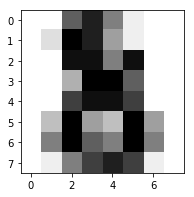

In [3]:
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

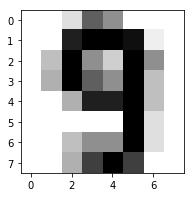

In [21]:
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-2], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

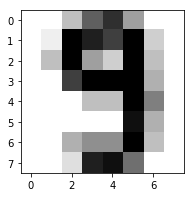

In [23]:
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-5], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

¡Exacto! Son imágenes de los dígitos (0, 1, 2...9), de muy baja calidad. Por eso tengo 64 columnas...cada una representa un pixel (o un _cuadrito_) de la imagen. Son imágenes de 8x8 pixeles (o sea, 64 en total...)

¿Y esos números entre 0 y 16 que estaban en mi matriz? Bueno, un 0 significa que el punto es blanco, un 16 que es negro, y los valores intermedios, tonos de grises.

Para trabajar hoy, tengo 1797 dibujos de dígitos.

In [33]:
objetivos = digits["target"]
objetivos

array([0, 1, 2, ..., 8, 9, 8])

En _target_ tengo contenidos los dígitos reales. Por eso se llama _target_: es mi objetivo, lo que quiero predecir. Además, puedo confirmar que, en efecto, son 1797 objetivos (uno por cada dibujo).

In [34]:
len(objetivos)

1797

Para no complicarme la vida, vamos a filtrar algunos datos, para quedarnos sólo con los 0 y 1. 

Hasta el momento, sólo sabía filtrar arreglos de Numpy por índices. ¿Recuerdas esto?

In [35]:
digits["target"][2:20]

array([2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Aquí, estoy agarrando sólo una fracción continua de los valores (funciona igual con listas y tuplas). 

Pero, ¿qué crees? Con NumPy, también puedo filtrar según alguna regla. ¿Qué tipo de regla? La más fácil: los operadores lógicos.

In [36]:
objetivos > 5

array([False, False, False, ...,  True,  True,  True])

In [37]:
objetivos != 1

array([ True, False,  True, ...,  True,  True,  True])

In [38]:
objetivos <= 3

array([ True,  True,  True, ..., False, False, False])

Etc etc. Cualquiera de ellos me dará un arreglo de puros valores True y False. 

Si meto esos dentro de corchetes, y los uso para filtrar mi arreglo original, me quedaré sólo con los que cumplen la regla.

In [39]:
digits["target"][objetivos == 0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

Y también puedo hacer filtros más complejos. ¿Recuerdas cuando veíamos Lógica? Ocupábamos operaciones como __Y, O, NO__, etc.

In [44]:
objetivos[~(objetivos == 9) ]

array([0, 1, 2, ..., 0, 8, 8])

In [48]:
objetivos[(objetivos % 2 == 0) & (objetivos > 5) ]

array([6, 8, 6, 8, 6, 8, 6, 8, 8, 8, 6, 6, 6, 6, 8, 6, 6, 6, 8, 6, 6, 8,
       8, 8, 8, 8, 6, 8, 6, 8, 6, 8, 6, 8, 8, 8, 6, 6, 6, 6, 8, 6, 6, 8,
       6, 6, 8, 8, 8, 8, 8, 6, 8, 6, 8, 6, 8, 6, 8, 8, 8, 6, 6, 6, 6, 8,
       6, 6, 6, 8, 6, 6, 8, 8, 8, 8, 6, 8, 6, 8, 6, 8, 6, 8, 8, 8, 6, 6,
       6, 6, 8, 6, 6, 6, 8, 6, 6, 8, 8, 8, 8, 8, 6, 8, 6, 8, 6, 8, 6, 8,
       8, 8, 6, 6, 6, 6, 8, 6, 6, 6, 8, 6, 6, 8, 8, 8, 8, 8, 6, 8, 6, 8,
       6, 8, 6, 8, 8, 8, 6, 6, 6, 6, 8, 6, 6, 6, 8, 6, 6, 8, 8, 8, 8, 8,
       6, 8, 6, 8, 6, 8, 6, 8, 8, 8, 6, 6, 6, 6, 8, 6, 6, 6, 8, 6, 6, 8,
       8, 8, 8, 8, 6, 8, 6, 8, 6, 8, 6, 8, 8, 8, 6, 6, 6, 6, 8, 6, 6, 6,
       8, 6, 6, 8, 8, 8, 6, 8, 6, 8, 6, 8, 6, 8, 8, 8, 6, 6, 6, 6, 8, 6,
       6, 6, 8, 6, 6, 8, 8, 8, 8, 8, 6, 8, 6, 8, 6, 8, 6, 8, 8, 8, 6, 6,
       6, 6, 8, 6, 6, 6, 8, 6, 6, 8, 8, 8, 8, 8, 6, 8, 6, 8, 6, 8, 6, 8,
       8, 8, 6, 6, 6, 6, 8, 6, 6, 6, 8, 6, 6, 8, 8, 8, 8, 6, 8, 6, 8, 6,
       8, 6, 8, 8, 8, 6, 6, 6, 6, 8, 6, 6, 6, 8, 6,

In [45]:
objetivos[(objetivos == 0) | (objetivos == 1) ]

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,

¡Este último filtro es el que me interesa!

Vamos, entonces, a crear un subconjunto de mis dibujos y de mis objetivos: sólo aquellos que sean 0s y 8s, que son más o menos parecidos.

In [107]:
digitos = digits["data"][(objetivos == 3) | (objetivos == 8) ]
digitos

array([[ 0.,  0.,  7., ...,  9.,  0.,  0.],
       [ 0.,  0.,  9., ..., 11.,  1.,  0.],
       [ 0.,  2.,  9., ..., 11.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  3.,  0.,  0.],
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [108]:
objetivos_01 = objetivos[(objetivos == 3) | (objetivos == 8) ]
objetivos_01

array([3, 8, 3, 8, 3, 8, 8, 8, 3, 8, 3, 3, 3, 3, 8, 3, 3, 3, 8, 3, 3, 8,
       8, 8, 8, 8, 3, 8, 3, 8, 3, 8, 8, 8, 3, 8, 3, 3, 3, 3, 8, 3, 3, 3,
       8, 3, 3, 8, 8, 8, 8, 8, 3, 8, 3, 8, 3, 8, 8, 8, 3, 8, 3, 3, 3, 3,
       8, 3, 3, 3, 8, 3, 3, 8, 8, 8, 8, 3, 3, 8, 3, 8, 3, 8, 8, 8, 3, 8,
       3, 3, 3, 3, 8, 3, 3, 3, 8, 3, 3, 8, 8, 8, 8, 8, 3, 8, 3, 8, 3, 8,
       8, 8, 3, 8, 3, 3, 3, 3, 8, 3, 3, 3, 8, 3, 3, 8, 8, 8, 8, 8, 3, 8,
       3, 8, 3, 8, 8, 8, 3, 8, 3, 3, 3, 3, 8, 3, 3, 3, 8, 3, 3, 8, 8, 8,
       8, 8, 3, 8, 3, 8, 3, 8, 8, 8, 3, 8, 3, 3, 3, 3, 8, 3, 3, 3, 8, 3,
       3, 8, 8, 8, 8, 8, 3, 8, 3, 8, 3, 8, 8, 8, 3, 8, 3, 3, 3, 3, 8, 3,
       3, 3, 8, 3, 3, 8, 8, 8, 3, 8, 3, 8, 3, 8, 8, 8, 3, 8, 3, 3, 3, 3,
       8, 3, 3, 3, 8, 3, 3, 8, 8, 8, 8, 8, 3, 8, 3, 8, 3, 8, 8, 8, 3, 8,
       3, 3, 3, 3, 8, 3, 3, 3, 8, 3, 3, 8, 8, 8, 8, 8, 3, 8, 3, 8, 3, 8,
       8, 8, 3, 8, 3, 3, 3, 3, 8, 3, 3, 3, 8, 3, 3, 8, 8, 8, 8, 3, 8, 3,
       8, 3, 8, 8, 8, 3, 8, 3, 3, 3, 3, 8, 3, 3, 3,

La idea es crear un modelo que prediga lo más correctamente posible, qué dibujos son 0s y cuáles son 1s. Para eso, existen varios algoritmos, muchos de los cuáles son "cajas negras"; es decir, las reglas para tomar esa decisión son tan complejas que son difíciles de entender para un ser humano. Eso no le quita que podamos (y debamos intentarlo); entre mejor conozcamos los algoritmos, mejor podremos ajustarlos.

Vamos a usar un algoritmo sencillo, del cuál después podrás leer: Máquina de Soporte Vectorial (SVM)

In [109]:
from sklearn import svm

Para inicializar un algoritmo en Python, se especifican los parámetros que definen los ajustes que haremos.

In [146]:
clf = svm.SVC(gamma=0.01, C=10)

# Esta parte se puede ajustar.

Luego, especificamos con qué datos vamos a entrenar. Lo ideal es separ nuestros datos, y usar algunos para entrenar, y otros para probar qué tan buen modelo se construyó. Así que separaremos nuestros datos.

In [147]:
train_digitos = digitos[0:200]
test_digitos = digitos[200:]

train_objetivos = objetivos_01[0:200]
test_objetivos = objetivos_01[200:]


In [148]:
clf.fit(train_digitos, train_objetivos)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Por cierto; el inicializar un modelo y el especificar los datos de entrenamiento se suele hacer en el mismo paso en R.

A continuación, predecimos para ver qué aprendió la computadora. Por lo tanto, ahora no le especificamos el objetivo, para que la nos diga qué predice sobre los datos de prueba.

In [149]:
prediccion = clf.predict(test_digitos)
prediccion

array([8, 3, 3, 8, 8, 8, 3, 8, 3, 8, 3, 8, 8, 8, 3, 8, 3, 3, 3, 3, 8, 3,
       3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 3,
       3, 3, 8, 3, 3, 8, 8, 3, 3, 8, 8, 8, 8, 8, 3, 8, 3, 8, 3, 8, 8, 8,
       3, 8, 3, 3, 3, 8, 8, 3, 3, 3, 8, 3, 3, 8, 8, 8, 8, 3, 8, 3, 8, 3,
       8, 8, 8, 3, 8, 3, 3, 3, 3, 8, 3, 3, 3, 8, 3, 3, 8, 8, 8, 8, 8, 3,
       8, 8, 3, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8, 3, 3, 8, 8, 3, 3, 8, 8, 3,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 8, 8, 3, 8, 8,
       8, 8, 8])

¿Le habrá atinado a todos? Vamos a confirmar:

In [150]:
(test_objetivos == prediccion)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True, False,  True, False, False,  True,  True,  True, False,
        True,  True,

¡Hay algunos falsos! Es decir, adivinó mal. ¿Qué tanto representa en porcentaje?

In [143]:
(test_objetivos == prediccion).mean()

0.8535031847133758

¡Bastante alto! A esta métrica se le conoce como la efectividad (o _accuracy_)...aunque no es la única métrica importante al evaluar un modelo.

### ¿Cómo se pueden mejorar esos modelos?

* Consiguiendo más datos (Necesito saber computación...)

* Limpiando mejor mis datos (Necesito saber álgebra lineal...)

* Creando mejores variables (Necesito saber cálculo...)

* Cambiando la forma de Evaluar (Si implica dinero, necesito saber Mates Financieras...)

* Ajustando mejor mis algoritmos (Necesito saber Estadística...)


Poco a poco adquirirás las herramientas para entender mejor estos temas. Lo importante es no desanimarse.

Por cierto, una computadora, al no tener inteligencia propia, sólo puede probar ajustar modelos más o menos al azar (eso sí, millones y millones de forma rápida). Sin embargo, todavía hoy en día, un humano que entienda de estos temas es vital para obtener aún mejores resultados, y en menor tiempo.

¿Queda tiempo? Trata de ajustar la fórmula para ajustar el algoritmo...quizá, puedas tener puntos extra en tu Examen Final.